In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
%precision 2
warnings.filterwarnings('ignore')

**Importing Libraries**

In [151]:
df=pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

**Reading Dataset**

In [152]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Total Null Values**

In [153]:
df['director'].fillna("Unknown", inplace = True)
df['cast'].fillna("Unknown", inplace = True)
df['country'].fillna("Unknown", inplace = True)

**Filling null values with zero or unknown in columns['director','cast','country']**

In [154]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

**Proof**

<AxesSubplot:>

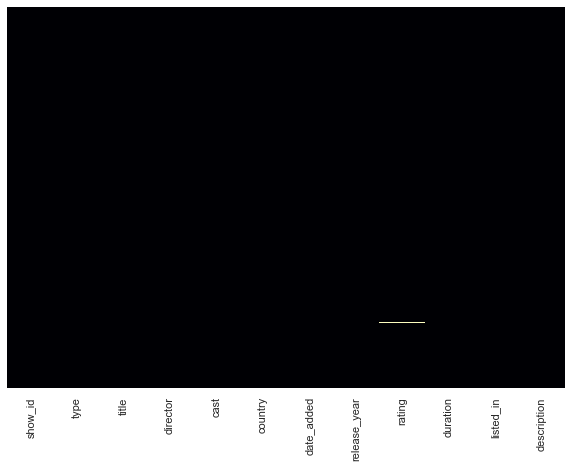

In [155]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.isnull(),yticklabels=False,cmap='magma',cbar=False)

**Heatmap**

In [156]:
df.shape

(8807, 12)

**(Row,Column)**

In [157]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Total Number of Entries in each column and data types of each column**

# Show_id

In [159]:
df['show_id'].value_counts()

s5914    1
s2659    1
s1897    1
s6767    1
s1547    1
        ..
s6237    1
s4840    1
s893     1
s6115    1
s1567    1
Name: show_id, Length: 8807, dtype: int64

# Type

In [160]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

# Title

In [161]:
df['title'].value_counts()

Donnie Brasco                                1
My Fuhrer                                    1
Sofia the First                              1
Mike Birbiglia: My Girlfriend's Boyfriend    1
The Body                                     1
                                            ..
Naruto                                       1
Westside Story                               1
Upstarts                                     1
V.R. Troopers                                1
Bullet Head                                  1
Name: title, Length: 8807, dtype: int64

# Director

In [162]:
df['director'].value_counts().iloc[:10]

Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

In [163]:
d1=df[df['director']=='Rajiv Chilaka']
d1

show_id   type                                              title  \
406     s407  Movie                       Chhota Bheem - Neeli Pahaadi   
407     s408  Movie                              Chhota Bheem & Ganesh   
408     s409  Movie                 Chhota Bheem & Krishna: Mayanagari   
409     s410  Movie  Chhota Bheem & Krishna: Pataliputra- City of t...   
410     s411  Movie                 Chhota Bheem And The Broken Amulet   
411     s412  Movie             Chhota Bheem And The Crown of Valhalla   
412     s413  Movie               Chhota Bheem and the Incan Adventure   
413     s414  Movie                Chhota Bheem and The ShiNobi Secret   
414     s415  Movie                           Chhota Bheem Aur Hanuman   
415     s416  Movie                           Chhota Bheem aur Krishna   
416     s417  Movie                Chhota Bheem aur Krishna vs Zimbara   
419     s420  Movie                      Chhota Bheem: Bheem vs Aliens   
420     s421  Movie               Chhota Bheem: Dholakpur to Kathmandu   
422     s423  Movie                     Chhota Bheem: Journey to Petra   
423     s424  Movie                    Chhota Bheem: Master of Shaolin   
424     s425  Movie                  Chhota Bheem: The Rise of Kirmada   
2717   s2718  Movie              Chhota Bheem and the Curse of Damyaan   
6297   s6298  Movie                                          Bheemayan   
6645   s6646  Movie                              Dragonkala Ka Rahasya   

           director                                               cast  \
406   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
407   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
408   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
409   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
410   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
411   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
412   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
413   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
414   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
415   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
416   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
419   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
420   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
422   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
423   Rajiv Chilaka  Pooja Punabi, Mausam, Julie Tejwani, Rupa Bhim...   
424   Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   
2717  Rajiv Chilaka  Kaustav Ghosh, Jigna Bhardwaj, Chutki, Rajesh ...   
6297  Rajiv Chilaka                                            Unknown   
6645  Rajiv Chilaka                                            Unknown   

      country     date_added  release_year rating duration  \
406   Unknown  July 22, 2021          2013  TV-Y7   64 min   
407   Unknown  July 22, 2021          2009  TV-Y7   68 min   
408   Unknown  July 22, 2021          2011  TV-Y7   67 min   
409   Unknown  July 22, 2021          2010  TV-Y7   66 min   
410     India  July 22, 2021          2013  TV-Y7   64 min   
411   Unknown  July 22, 2021          2013  TV-Y7   64 min   
412   Unknown  July 22, 2021          2013  TV-Y7   65 min   
413   Unknown  July 22, 2021          2013  TV-Y7   64 min   
414   Unknown  July 22, 2021          2012  TV-Y7   68 min   
415     India  July 22, 2021          2009  TV-Y7   68 min   
416   Unknown  July 22, 2021          2013  TV-Y7   64 min   
419   Unknown  July 22, 2021          2010  TV-Y7   69 min   
420   Unknown  July 22, 2021          2012  TV-Y7   70 min   
422   Unknown  July 22, 2021          2011  TV-Y7   68 min   
423   Unknown  July 22, 2021          2011  TV-Y7   74 min   
424   Unknown  July 22, 2021          2012  TV-Y7  

In [164]:
d1['type'].value_counts()

Movie    19
Name: type, dtype: int64

<AxesSubplot:xlabel='title', ylabel='count'>

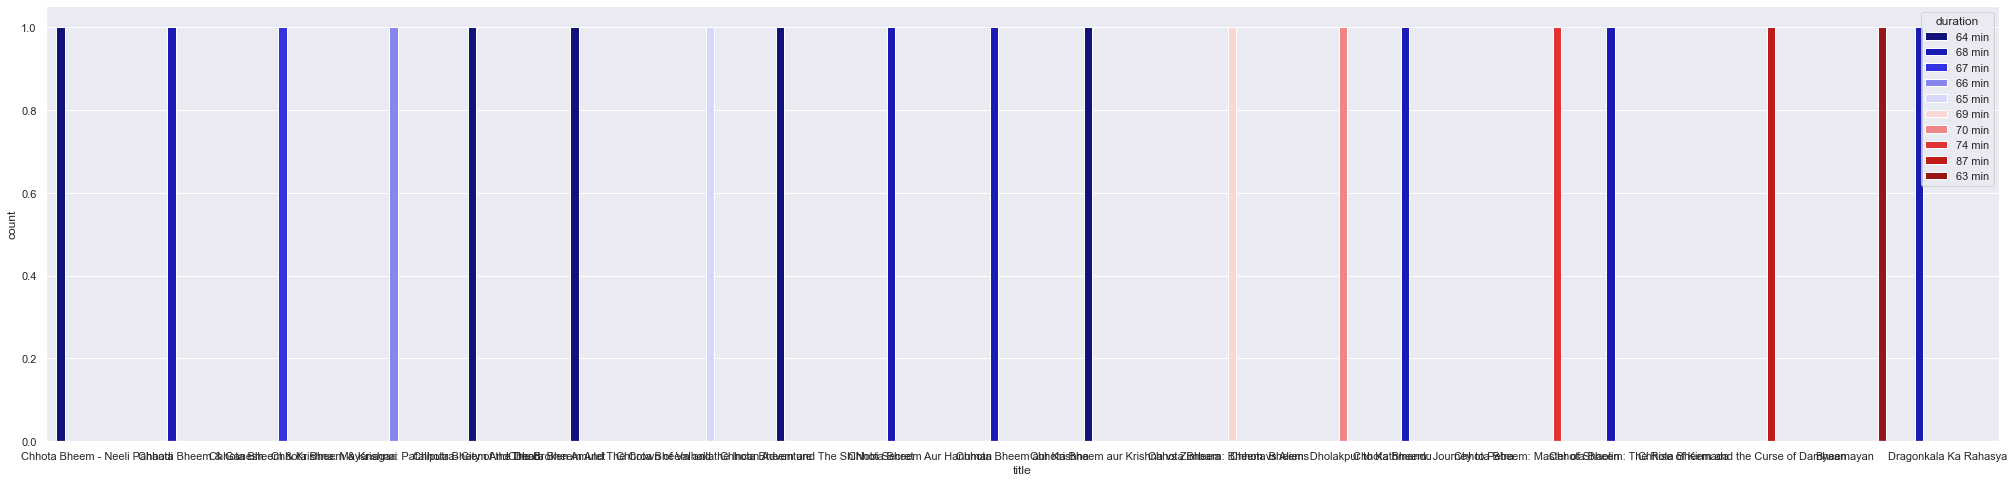

In [165]:
plt.figure(figsize=(35,8))
sns.countplot(x='title',hue='duration',data=d1,palette='seismic')

**Almost all the movies released by director 'Rajiv Chilaka' are of same duration** 

In [166]:
d2=df[df['director']=='Raúl Campos, Jan Suter']
d2

show_id   type                                        title  \
4749   s4750  Movie          Coco y Raulito: Carrusel de ternura   
4781   s4782  Movie                Luciano Mellera: Infantiloide   
4808   s4809  Movie  Jani Dueñas: Grandes fracasos de ayer y hoy   
4849   s4850  Movie                     Fernando Sanjiao: Hombre   
4866   s4867  Movie                  Carlos Ballarta: Furia Ñera   
4940   s4941  Movie            Todo lo que sería Lucas Lauriente   
4962   s4963  Movie      Sofía Niño de Rivera: Selección Natural   
5001   s5002  Movie            Malena Pichot: Estupidez compleja   
5002   s5003  Movie             Natalia Valdebenito: El especial   
5062   s5063  Movie                  Sebastián Marcelo Wainraich   
5066   s5067  Movie               Ricardo Quevedo: Hay gente así   
5076   s5077  Movie               Arango y Sanint: Ríase el show   
5176   s5177  Movie                                    Mea Culpa   
5342   s5343  Movie               Alan Saldaña: Mi vida de pobre   
5614   s5615  Movie                        Daniel Sosa: Sosafado   
5678   s5679  Movie           Ricardo O'Farrill: Abrazo navideño   
5839   s5840  Movie                Sofía Niño de Rivera: Exposed   
5872   s5873  Movie              Ricardo O'Farrill Abrazo Genial   

                    director  \
4749  Raúl Campos, Jan Suter   
4781  Raúl Campos, Jan Suter   
4808  Raúl Campos, Jan Suter   
4849  Raúl Campos, Jan Suter   
4866  Raúl Campos, Jan Suter   
4940  Raúl Campos, Jan Suter   
4962  Raúl Campos, Jan Suter   
5001  Raúl Campos, Jan Suter   
5002  Raúl Campos, Jan Suter   
5062  Raúl Campos, Jan Suter   
5066  Raúl Campos, Jan Suter   
5076  Raúl Campos, Jan Suter   
5176  Raúl Campos, Jan Suter   
5342  Raúl Campos, Jan Suter   
5614  Raúl Campos, Jan Suter   
5678  Raúl Campos, Jan Suter   
5839  Raúl Campos, Jan Suter   
5872  Raúl Campos, Jan Suter   

                                                   cast    country  \
4749                           Coco Celis, Raúl Meneses     Mexico   
4781                                    Luciano Mellera  Argentina   
4808                                        Jani Dueñas      Chile   
4849                                   Fernando Sanjiao  Argentina   
4866                                    Carlos Ballarta     Mexico   
4940                                    Lucas Lauriente  Argentina   
4962                               Sofía Niño de Rivera     Mexico   
5001                                      Malena Pichot  Argentina   
5002                                Natalia Valdebenito      Chile   
5062                        Sebastián Marcelo Wainraich  Argentina   
5066                                    Ricardo Quevedo   Colombia   
5076                      Julián Arango, Antonio Sanint   Colombia   
5176                                     Alexis de Anda     Mexico   
5342                                       Alan Saldaña     Mexico   
5614                                        Daniel Sosa     Mexico   
5678  Ricardo O'Farrill, Carlos Ballarta, Sofía Niño...     Mexico   
5839                               Sofía Niño de Rivera     Mexico   
5872                                  Ricardo O'Farrill     Mexico   

             date_added  release_year rating duration        listed_in  \
4749      July 27, 2018          2018  TV-MA   57 min  Stand-Up Comedy   
4781       July 6, 2018          2018  TV-14   66 min  Stand-Up Comedy   
4808      June 29, 2018          2018  TV-MA   77 min  Stand-Up Comedy   
4849       May 25, 2018          2018  TV-MA   63 min  Stand-Up Comedy   
4866       May 11, 2018          2018  TV-MA   63 min  Stand-Up Comedy   
4940      April 6, 2018          2018  TV-MA   78 min  Stand-Up Comedy   
4962     March 30, 2018          2018  TV-MA   62 min  Stand-Up Comedy   
5001      March 2, 2018          2018  TV-MA   51 min  Stand-Up Comedy   
5002      March 2, 2018          2018  TV-MA   69 min  Stand-Up Comedy   
5062   January 26, 2018         

In [167]:
d2['type'].value_counts()

Movie    18
Name: type, dtype: int64

<AxesSubplot:xlabel='title', ylabel='count'>

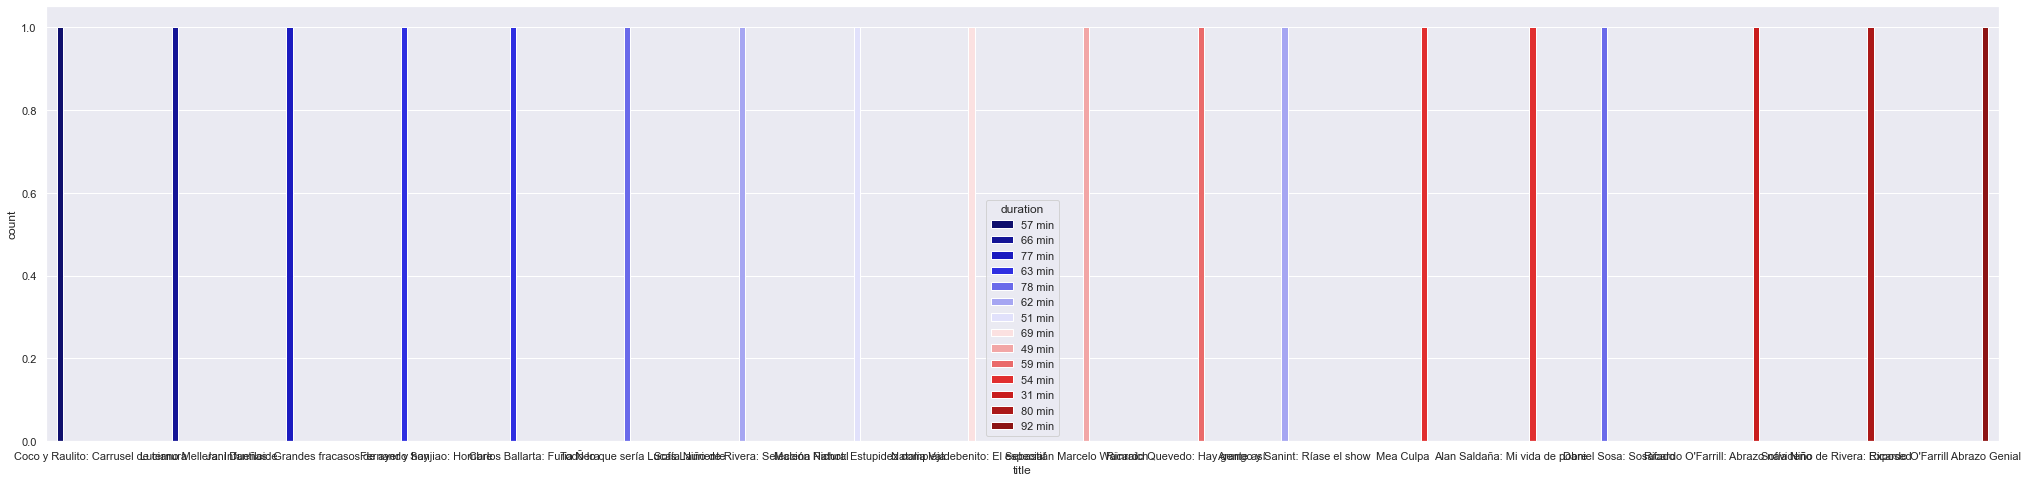

In [168]:
plt.figure(figsize=(35,8))
sns.countplot(x='title',hue='duration',data=d2,palette='seismic')

**Duration of movies released by directors Raúl Campos and Jan Suter ranges between 60min - 100min**

# Rating

In [169]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: rating, dtype: int64

**[TV-MA]Maximum number of TV shows on Netflix are rated for Mature Audience which means 17+ age.**

**[TV-14]Next are TV shows on Netflix which rated for people age 14+.**

**[TV-PG]Then next are Parental Guidance rated TV shows which means that it depends on parents to whether present the TV show to kids or not because it may contain some scenes which would probably not good for kids.**

**[R]Next is R rated movies or TV shows which require permission of parents whether to present the show or movie to the kids which are 17 below.**

**[PG-13]Next is PG-13 rated movies or TV shows which are restricted for kids below 13 age.**


In [170]:
r1=df[df['rating']=='TV-MA']
r1

show_id     type                   title                 director  \
1         s2  TV Show           Blood & Water                  Unknown   
2         s3  TV Show               Ganglands          Julien Leclercq   
3         s4  TV Show   Jailbirds New Orleans                  Unknown   
4         s5  TV Show            Kota Factory                  Unknown   
5         s6  TV Show           Midnight Mass            Mike Flanagan   
...      ...      ...                     ...                      ...   
8762   s8763    Movie         Wrong Side Raju            Mikhil Musale   
8769   s8770    Movie  Y.M.I.: Yeh Mera India               N. Chandra   
8788   s8789    Movie            You Carry Me               Ivona Juka   
8798   s8799    Movie                Zed Plus  Chandra Prakash Dwivedi   
8801   s8802    Movie                 Zinzana          Majid Al Ansari   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                               Unknown   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
...                                                 ...   
8762  Pratik Gandhi, Kimberley Louisa McBeath, Asif ...   
8769  Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...   
8788  Lana Baric, Vojislav Brajovic, Natasa Janjic, ...   
8798  Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   

                                    country          date_added  release_year  \
1                              South Africa  September 24, 2021          2021   
2                                   Unknown  September 24, 2021          2021   
3                                   Unknown  September 24, 2021          2021   
4                                     India  September 24, 2021          2021   
5                                   Unknown  September 24, 2021          2021   
...                                     ...                 ...           ...   
8762                                  India     October 1, 2017          2016   
8769                                  India       March 1, 2018          2008   
8788  Croatia, Slovenia, Serbia, Montenegro        July 1, 2016          2015   
8798                                  India   December 31, 2019          2014   
8801           United Arab Emirates, Jordan       March 9, 2016          2015   

     rating   duration                                          listed_in  \
1     TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2     TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Act...   
3     TV-MA   1 Season                             Docuseries, Reality TV   
4     TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
5     TV-MA   1 Season                 TV Dramas, TV Horror, TV Mysteries   
...     ...        ...                                                ...   
8762  TV-MA    140 min                       Dramas, International Movies   
8769  TV-MA    137 min   Dramas, Independent Movies, International Movies   
8788  TV-MA    157 min                       Dramas, International Movies   
8798  TV-MA    131 min             Comedies, Dramas, International Movies   
8801  TV-MA     96 min            Dramas, International Movies, Thrillers   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
...                                                 ...  
8762  The life of a chauffeur and part-time bootlegg...  
8769  The lives of a middle-aged soap opera a

**All the movies and series which are rated TV-MA**

In [171]:
r1['duration'].value_counts()

1 Season      772
2 Seasons     191
3 Seasons      95
97 min         62
90 min         54
             ... 
196 min         1
157 min         1
176 min         1
194 min         1
13 Seasons      1
Name: duration, Length: 158, dtype: int64

In [172]:
r2=df[df['rating']=='TV-14']
r2

show_id     type                                            title  \
8         s9  TV Show                    The Great British Baking Show   
18       s19    Movie                                        Intrusion   
20       s21  TV Show  Monsters Inside: The 24 Faces of Billy Milligan   
21       s22  TV Show                           Resurrection: Ertugrul   
24       s25    Movie                                            Jeans   
...      ...      ...                                              ...   
8772   s8773    Movie                            Yamla Pagla Deewana 2   
8774   s8775    Movie                                        يوم الدين   
8794   s8795    Movie                                           اشتباك   
8799   s8800    Movie                                            Zenda   
8806   s8807    Movie                                           Zubaan   

             director                                               cast  \
8     Andy Devonshire  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
18         Adam Salky  Freida Pinto, Logan Marshall-Green, Robert Joh...   
20    Olivier Megaton                                            Unknown   
21            Unknown  Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...   
24         S. Shankar  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
...               ...                                                ...   
8772   Sangeeth Sivan  Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...   
8774  Abu Bakr Shawky  Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...   
8794     Mohamed Diab  Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...   
8799   Avadhoot Gupte  Santosh Juvekar, Siddharth Chandekar, Sachit P...   
8806      Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                            country          date_added  release_year rating  \
8                    United Kingdom  September 24, 2021          2021  TV-14   
18                          Unknown  September 22, 2021          2021  TV-14   
20                          Unknown  September 22, 2021          2021  TV-14   
21                           Turkey  September 22, 2021          2018  TV-14   
24                            India  September 21, 2021          1998  TV-14   
...                             ...                 ...           ...    ...   
8772                          India         May 1, 2017          2013  TV-14   
8774  Egypt, Austria, United States    October 22, 2019          2018  TV-14   
8794                  Egypt, France    October 11, 2018          2016  TV-14   
8799                          India   February 15, 2018          2009  TV-14   
8806                          India       March 2, 2019          2015  TV-14   

       duration                                          listed_in  \
8     9 Seasons                       British TV Shows, Reality TV   
18       94 min                                          Thrillers   
20     1 Season  Crime TV Shows, Docuseries, International TV S...   
21    5 Seasons  International TV Shows, TV Action & Adventure,...   
24      166 min    Comedies, International Movies, Romantic Movies   
...         ...                                                ...   
8772    147 min  Action & Adventure, Comedies, International Mo...   
8774     97 min   Dramas, Independent Movies, International Movies   
8794     98 min   Dramas, Independent Movies, International Movies   
8799    120 min                       Dramas, International Movies   
8806    111 min     Dramas, International Movies, Music & Musicals   

                                            description  
8     A talented batch of amateur bakers face off in...  
18    After a deadly home invasion at a couple’s new...  
20    In the late 1970s, an accused serial rapist cl...  
21    When a good deed unwittingly endangers his cla...  
24    When the father of the man she loves insists t...  
...                                                 .

**All the movies and series which are rated TV-14**

In [173]:
r2['duration'].value_counts()

1 Season      534
2 Seasons      73
3 Seasons      36
98 min         31
96 min         29
             ... 
39 min          1
63 min          1
237 min         1
176 min         1
10 Seasons      1
Name: duration, Length: 177, dtype: int64

In [174]:
r3=df[df['rating']=='TV-PG']
r3

show_id     type                                            title  \
13       s14    Movie                 Confessions of an Invisible Girl   
22       s23    Movie                                  Avvai Shanmughi   
26       s27    Movie                                   Minsara Kanavu   
50       s51  TV Show                                    Dharmakshetra   
53       s54    Movie  InuYasha the Movie 4: Fire on the Mystic Island   
...      ...      ...                                              ...   
8779   s8780    Movie                                    Yes or No 2.5   
8787   s8788    Movie                        You Can’t Fight Christmas   
8789   s8790    Movie                              You Changed My Life   
8796   s8797  TV Show                                       Yunus Emre   
8800   s8801  TV Show                               Zindagi Gulzar Hai   

                 director                                               cast  \
13          Bruno Garotti  Klara Castanho, Lucca Picon, Júlia Gomes, Marc...   
22         K.S. Ravikumar  Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...   
26            Rajiv Menon  Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....   
50                Unknown  Kashmira Irani, Chandan Anand, Dinesh Mehta, A...   
53      Toshiya Shinohara  Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...   
...                   ...                                                ...   
8779    Kirati Nakintanon  Supanart Jittaleela, Pimpakan Bangchawong, Cha...   
8787          Kenny Young  Brely Evans, Andra Fuller, Persia White, Porsc...   
8789  Cathy Garcia-Molina  John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...   
8796              Unknown  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
8800              Unknown  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   

            country          date_added  release_year rating   duration  \
13          Unknown  September 22, 2021          2021  TV-PG     91 min   
22          Unknown  September 21, 2021          1996  TV-PG    161 min   
26          Unknown  September 21, 2021          1997  TV-PG    147 min   
50            India  September 15, 2021          2014  TV-PG   1 Season   
53            Japan  September 15, 2021          2004  TV-PG     88 min   
...             ...                 ...           ...    ...        ...   
8779       Thailand    November 8, 2018          2015  TV-PG    107 min   
8787  United States   December 19, 2017          2017  TV-PG     85 min   
8789    Philippines   February 27, 2019          2009  TV-PG    116 min   
8796         Turkey    January 17, 2017          2016  TV-PG  2 Seasons   
8800       Pakistan   December 15, 2016          2012  TV-PG   1 Season   

                                              listed_in  \
13                   Children & Family Movies, Comedies   
22                       Comedies, International Movies   
26     Comedies, International Movies, Music & Musicals   
50    International TV Shows, TV Dramas, TV Sci-Fi &...   
53    Action & Adventure, Anime Features, Internatio...   
...                                                 ...   
8779  International Movies, LGBTQ Movies, Romantic M...   
8787                          Comedies, Romantic Movies   
8789             Comedies, Dramas, International Movies   
8796                  International TV Shows, TV Dramas   
8800  International TV Shows, Romantic TV Shows, TV ...   

                                            description  
13    When the clever but socially-awkward Tetê join...  
22    Newly divorced and denied visitation rights wi...  
26    A tangled love triangle ensues when a man fall...  
50    After the ancient Great War, the god Chitragup...  
53    Ai, a young half-demon who has escaped from Ho...  
...                                                 ...  
8779  Roommates Wine and Pie find their lives turned...  
8787  After stepping in to revitalize his family's h...  
8789  Laida and Miggy t

**All the movies and series which are rated TV-PG**

<AxesSubplot:xlabel='count', ylabel='rating'>

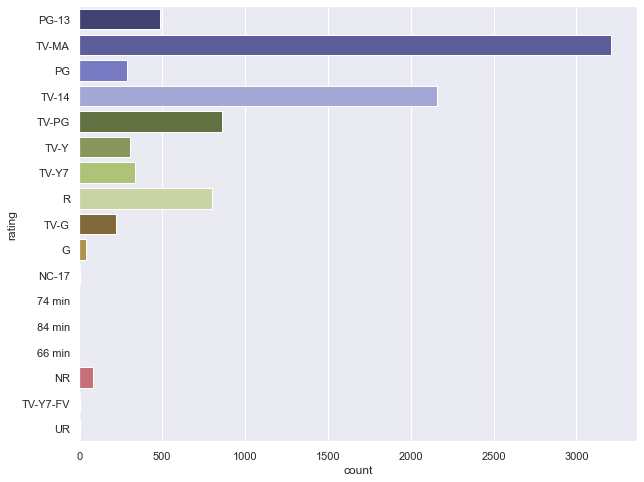

In [175]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,8))
sns.countplot(y='rating',data=df,palette='tab20b')

**Countplot on column ['Rating']**

# Cast

In [176]:
df['cast'].value_counts()

Unknown                                                                                                                                                                                                 825
David Attenborough                                                                                                                                                                                       19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                  14
Samuel West                                                                                                                                                                                              10
Jeff Dunham                                                                                                                                                                             

In [177]:
s=df['cast'].str.split(',', expand=True)
s

0                 1                   2   \
0             Unknown              None                None   
1          Ama Qamata       Khosi Ngema       Gail Mabalane   
2       Sami Bouajila      Tracy Gotoas         Samuel Jouy   
3             Unknown              None                None   
4          Mayur More    Jitendra Kumar          Ranjan Raj   
...               ...               ...                 ...   
8802     Mark Ruffalo   Jake Gyllenhaal   Robert Downey Jr.   
8803          Unknown              None                None   
8804  Jesse Eisenberg   Woody Harrelson          Emma Stone   
8805        Tim Allen     Courteney Cox         Chevy Chase   
8806    Vicky Kaushal   Sarah-Jane Dias     Raaghav Chanana   

                     3                  4                  5   \
0                  None               None               None   
1        Thabang Molaba   Dillon Windvogel    Natasha Thahane   
2         Nabiha Akkari     Sofia Lesaffre   Salim Kechiouche   
3                  None               None               None   
4             Alam Khan      Ahsaas Channa     Revathi Pillai   
...                 ...                ...                ...   
8802    Anthony Edwards          Brian Cox       Elias Koteas   
8803               None               None               None   
8804    Abigail Breslin        Amber Heard        Bill Murray   
8805          Kate Mara        Ryan Newman    Michael Cassidy   
8806   Manish Chaudhary       Meghna Malik      Malkeet Rauni   

                      6                       7                 8   \
0                   None                    None              None   
1            Arno Greeff       Xolile Tshabalala   Getmore Sithole   
2      Noureddine Farihi    Geert Van Rampelberg   Bakary Diombera   
3                   None                    None              None   
4             Urvi Singh              Arun Kumar              None   
...                  ...                     ...               ...   
8802         Donal Logue      John Carroll Lynch   Dermot Mulroney   
8803                None                    None              None   
8804          Derek Graf                    None              None   
8805     Spencer Breslin                Rip Torn      Kevin Zegers   
8806      Anita Shabdish   Chittaranjan Tripathy              None   

                   9   ...    40    41    42    43    44    45    46    47  \
0                None  ...  None  None  None  None  None  None  None  None   
1      Cindy Mahlangu  ...  None  None  None  None  None  None  None  None   
2                None  ...  None  None  None  None  None  None  None  None   
3                None  ...  None  None  None  None  None  None  None  None   
4                None  ...  None  None  None  None  None  None  None  None   
...               ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
8802    Chloë Sevigny  ...  None  None  None  None  None  None  None  None   
8803             None  ...  None  None  None  None  None  None  None  None   
8804             None  ...  None  None  None  None  None  None  None  None   
8805             None  ...  None  None  None  None  None  None  None  None   
8806             None  ...  None  None  None  None  None  None  None  None   

        48    49  
0     None  None  
1     None  None  
2     None  None  
3     None  None  
4     None  None  
...    ...   ...  
8802  None  None  
8803  None  None  
8804  None  None  
8805  None  None  
8806  None  None  

[8807 rows x 50 columns]

**Separated and concatenated the column Cast to find value_counts of each cast**

In [178]:
c=pd.concat([s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18],s[19],s[20],s[21],s[22],s[23],s[24],s[25],s[26],s[27],s[28],s[29],s[30],s[31],s[32],s[33],s[34],s[35],s[36],s[37],s[38],s[39],s[40],s[41],s[42],s[43],s[44],s[45],s[46],s[47],s[48],s[49]],ignore_index=True)
c

0               Unknown
1            Ama Qamata
2         Sami Bouajila
3               Unknown
4            Mayur More
              ...      
440345             None
440346             None
440347             None
440348             None
440349             None
Length: 440350, dtype: object

**Concatenation[adding two columns] of each cast under one column but in separated form.**

In [179]:
c.value_counts().iloc[:5]

Unknown              825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
dtype: int64

**Finally we can see the top most Cast and their value_counts**

# Country

In [180]:
df['country'].value_counts()

United States                                             2818
India                                                      972
Unknown                                                    831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
United Kingdom, France, Poland, Germany, United States       1
Spain, United States                                         1
Ireland, United Kingdom, Italy, United States                1
United Kingdom, Italy, Israel, Peru, United States           1
Japan, Canada                                                1
Name: country, Length: 749, dtype: int64

<AxesSubplot:xlabel='count', ylabel='country'>

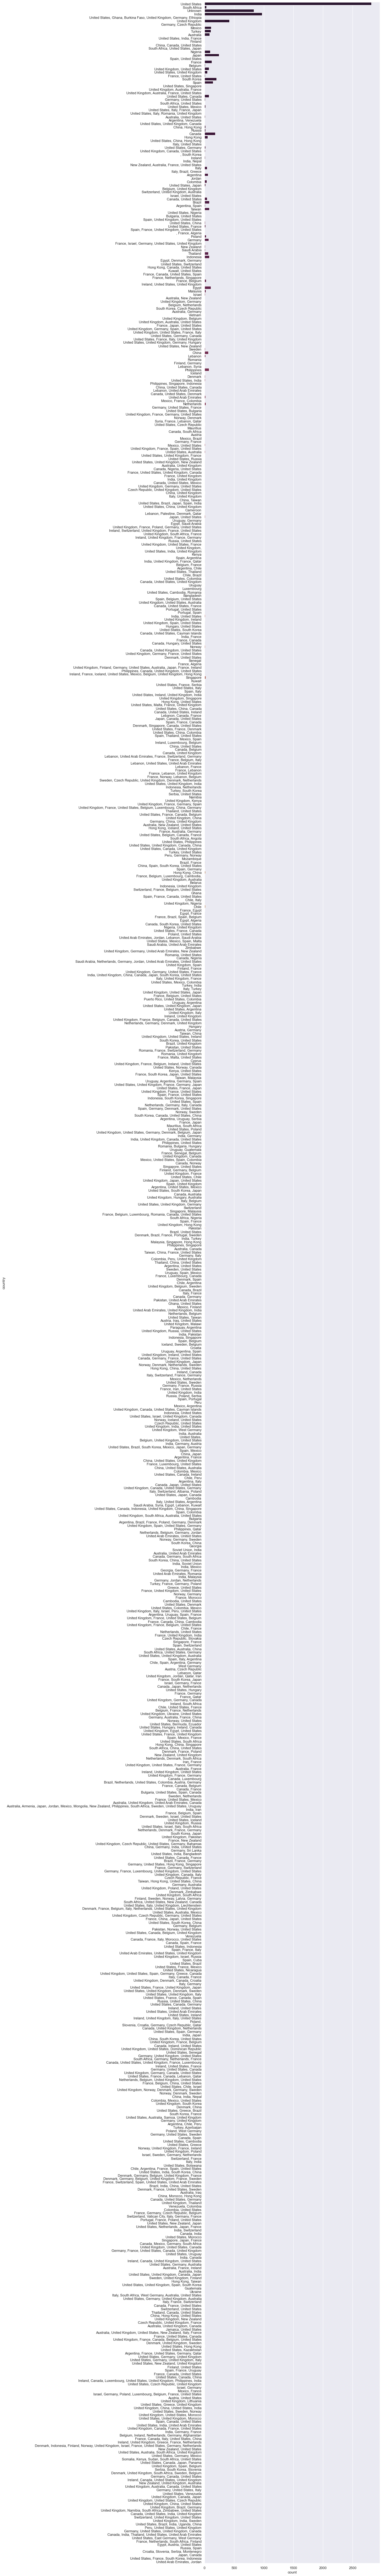

In [181]:
plt.figure(figsize = (10, 150)) 
sns.countplot(y='country',data=df,palette='twilight_shifted_r')

**Countplot on column ['Country']**

**Top 4 countries who have uploaded their series or movies or tv shows on Netflix**

**1)USA**

**2)India**

**3)United Kingdom**

**4)Japan**

# Date Added

In [182]:
df['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 6, 2017       1
August 25, 2019        1
April 25, 2016         1
April 10, 2021         1
October 24, 2014       1
Name: date_added, Length: 1767, dtype: int64

In [183]:
bydate = df.groupby(by='date_added').count()
bydate.head(10)

show_id  type  title  director  cast  country  \
date_added                                                         
 April 15, 2018          1     1      1         1     1        1   
 April 16, 2019          1     1      1         1     1        1   
 April 17, 2016          1     1      1         1     1        1   
 April 20, 2017          1     1      1         1     1        1   
 April 4, 2017           1     1      1         1     1        1   
 August 1, 2017          1     1      1         1     1        1   
 August 13, 2018         1     1      1         1     1        1   
 August 21, 2017         1     1      1         1     1        1   
 August 4, 2017          3     3      3         3     3        3   
 December 1, 2018        1     1      1         1     1        1   

                   release_year  rating  duration  listed_in  description  
date_added                                                                 
 April 15, 2018               1       1         1          1            1  
 April 16, 2019               1       1         1          1            1  
 April 17, 2016               1       1         1          1            1  
 April 20, 2017               1       1         1          1            1  
 April 4, 2017                1       1         1          1            1  
 August 1, 2017               1       1         1          1            1  
 August 13, 2018              1       1         1          1            1  
 August 21, 2017              1       1         1          1            1  
 August 4, 2017               3       3         3          3            3  
 December 1, 2018             1       1         1          1            1

**Groupby Tabular form which shows count of each column with respect to a particular column['date_added']**

<AxesSubplot:xlabel='count', ylabel='date_added'>

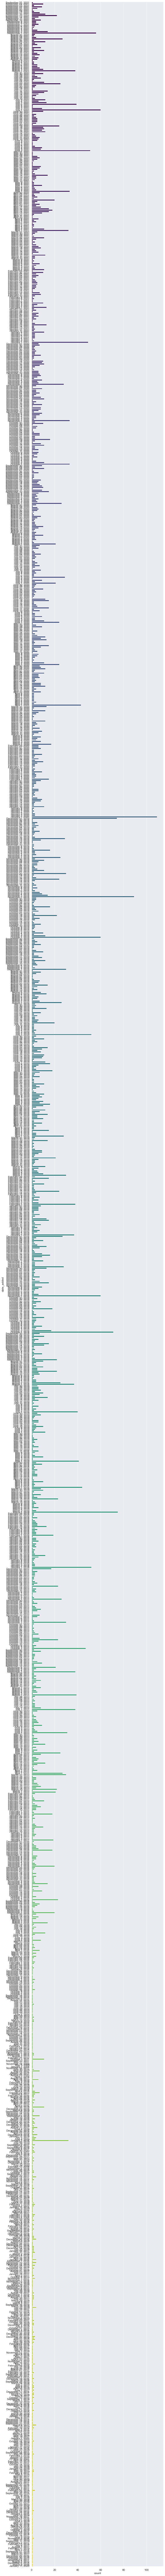

In [184]:
plt.figure(figsize = (10, 200)) 
sns.countplot(y='date_added',data=df,palette='viridis')

**Countplot on column ['date_added']**

# Release Date

In [185]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [186]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

<AxesSubplot:xlabel='release_year', ylabel='count'>

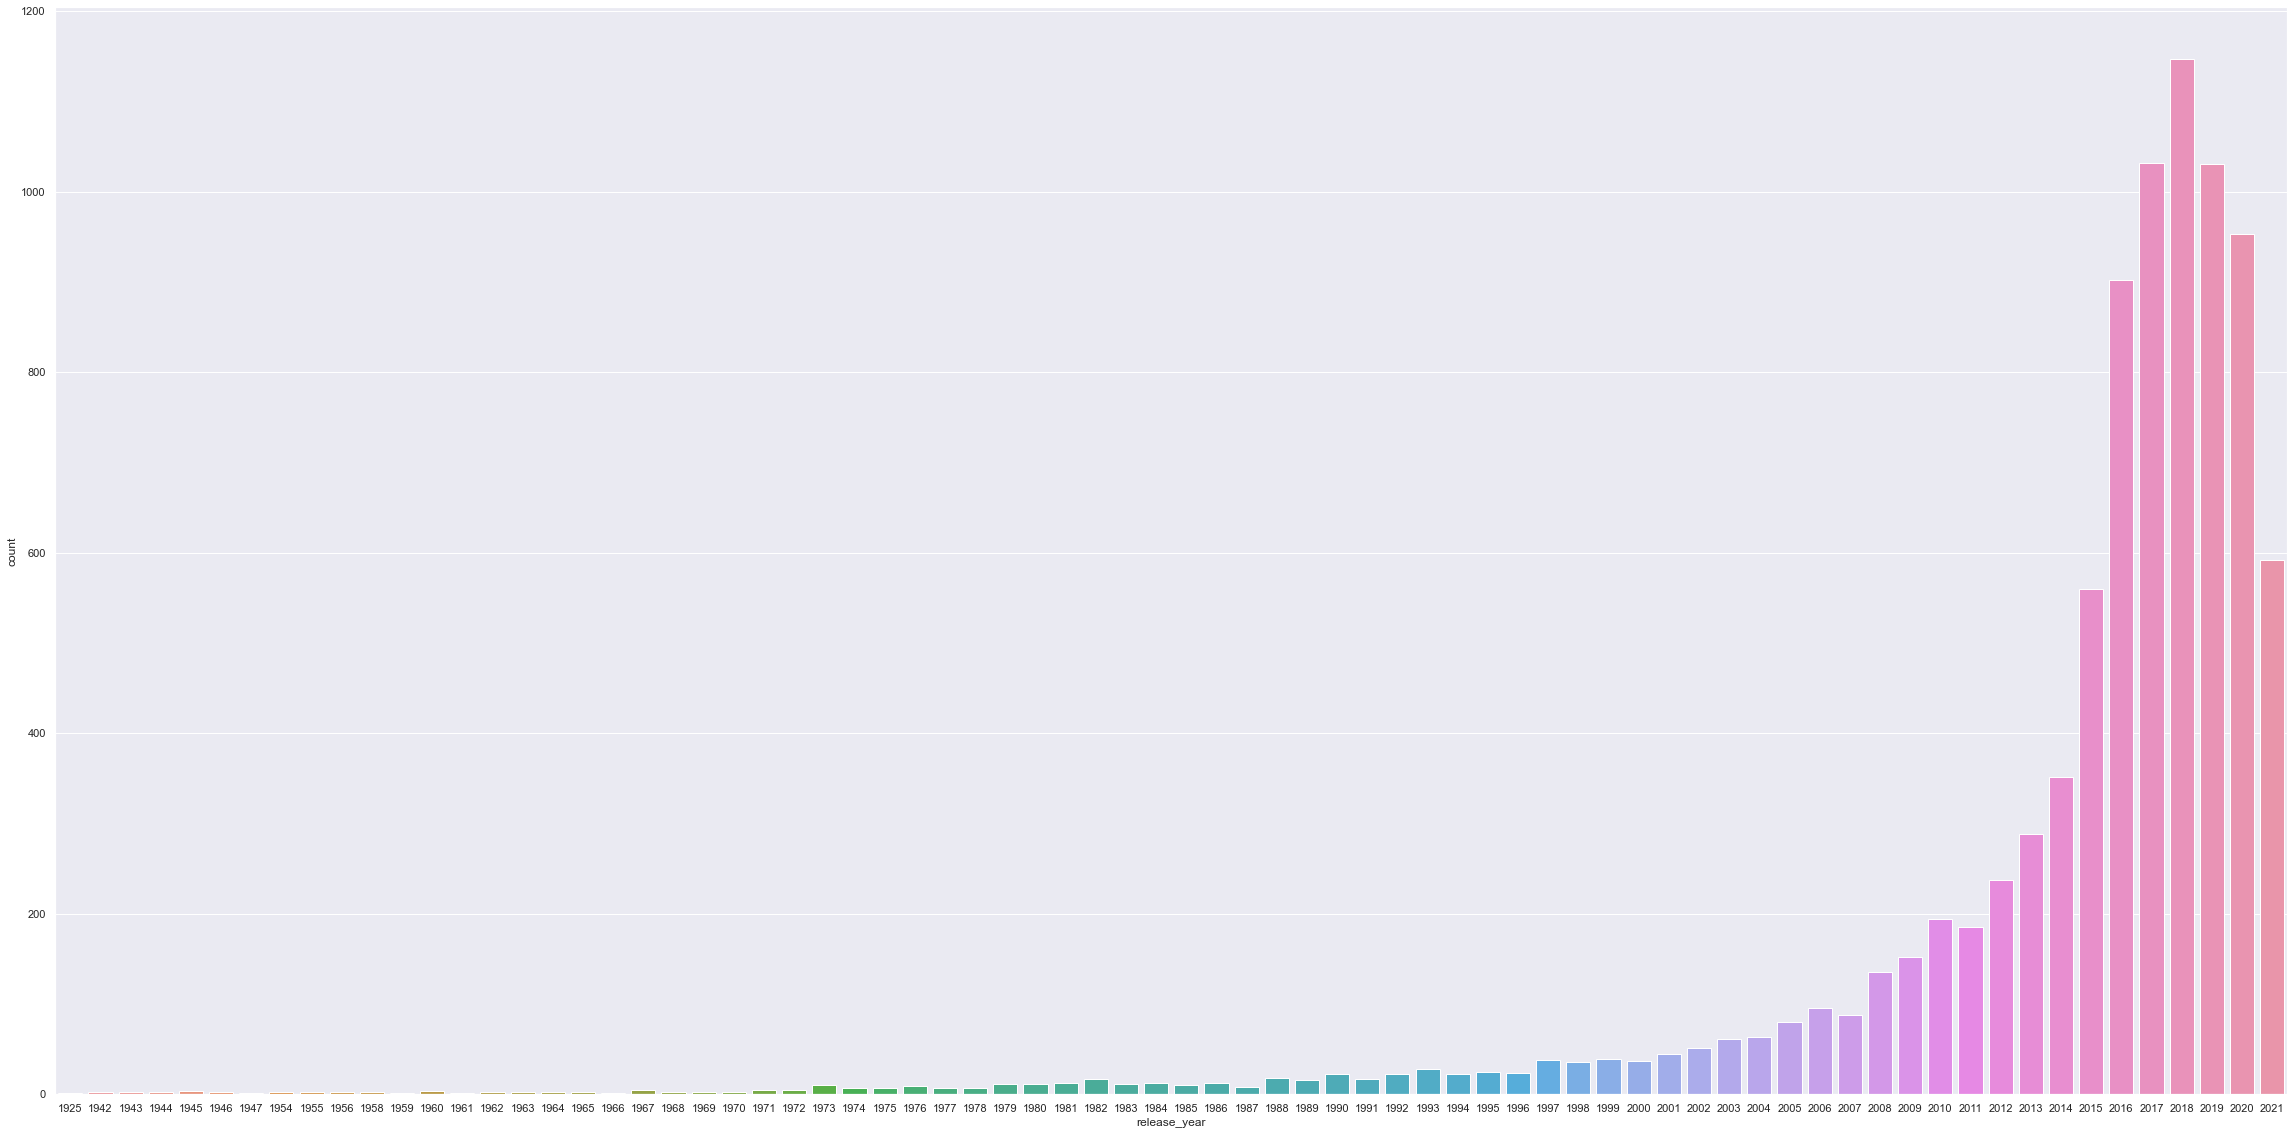

In [187]:
import seaborn as sns
sns.set(font_scale = 4)
sns.set(rc={'figure.figsize':(40,20)})
sns.countplot(x='release_year',data=df)

**From the graph we can see that Netflix started uploading more Movies and TV shows from the year 2014. But due to pandemic their numbers decreased between year 2020-2021 and then again increased.**

In [188]:
byrelease_year = df.groupby(by='release_year').count()
byrelease_year

show_id  type  title  director  cast  country  date_added  \
release_year                                                              
1925                1     1      1         1     1        1           1   
1942                2     2      2         2     2        2           2   
1943                3     3      3         3     3        3           3   
1944                3     3      3         3     3        3           3   
1945                4     4      4         4     4        4           4   
...               ...   ...    ...       ...   ...      ...         ...   
2017             1032  1032   1032      1032  1032     1032        1032   
2018             1147  1147   1147      1147  1147     1147        1146   
2019             1030  1030   1030      1030  1030     1030        1030   
2020              953   953    953       953   953      953         953   
2021              592   592    592       592   592      592         592   

              rating  duration  listed_in  description  
release_year                                            
1925               1         1          1            1  
1942               2         2          2            2  
1943               3         3          3            3  
1944               3         3          3            3  
1945               4         4          4            4  
...              ...       ...        ...          ...  
2017            1031      1031       1032         1032  
2018            1147      1147       1147         1147  
2019            1030      1030       1030         1030  
2020             953       953        953          953  
2021             592       592        592          592  

[74 rows x 11 columns]

**Groupby Tabular form which shows count of each column with respect to a particular column['release_year']**

<AxesSubplot:>

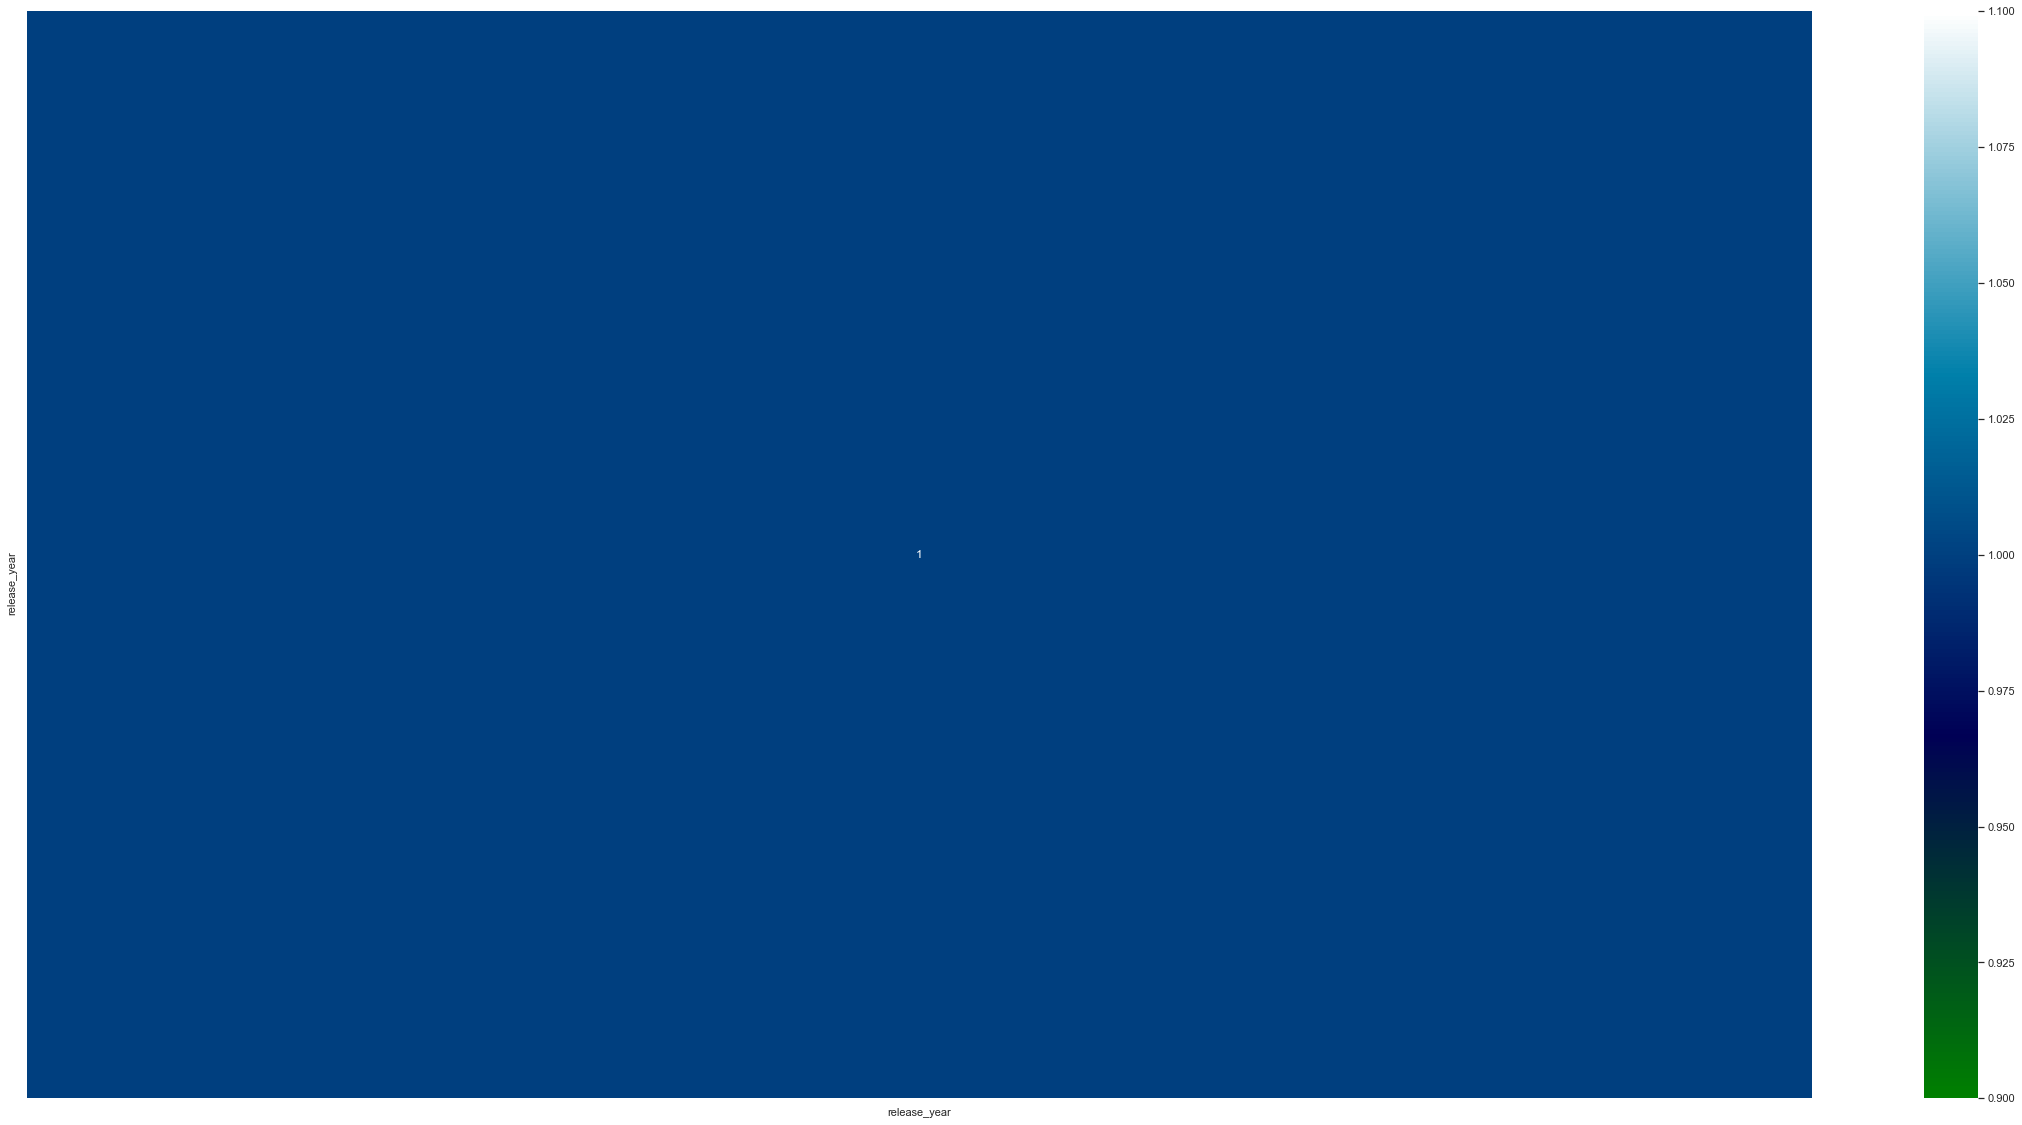

In [189]:
sns.heatmap(df.corr(), cmap="ocean", annot=True)

**Correlation on overall data**

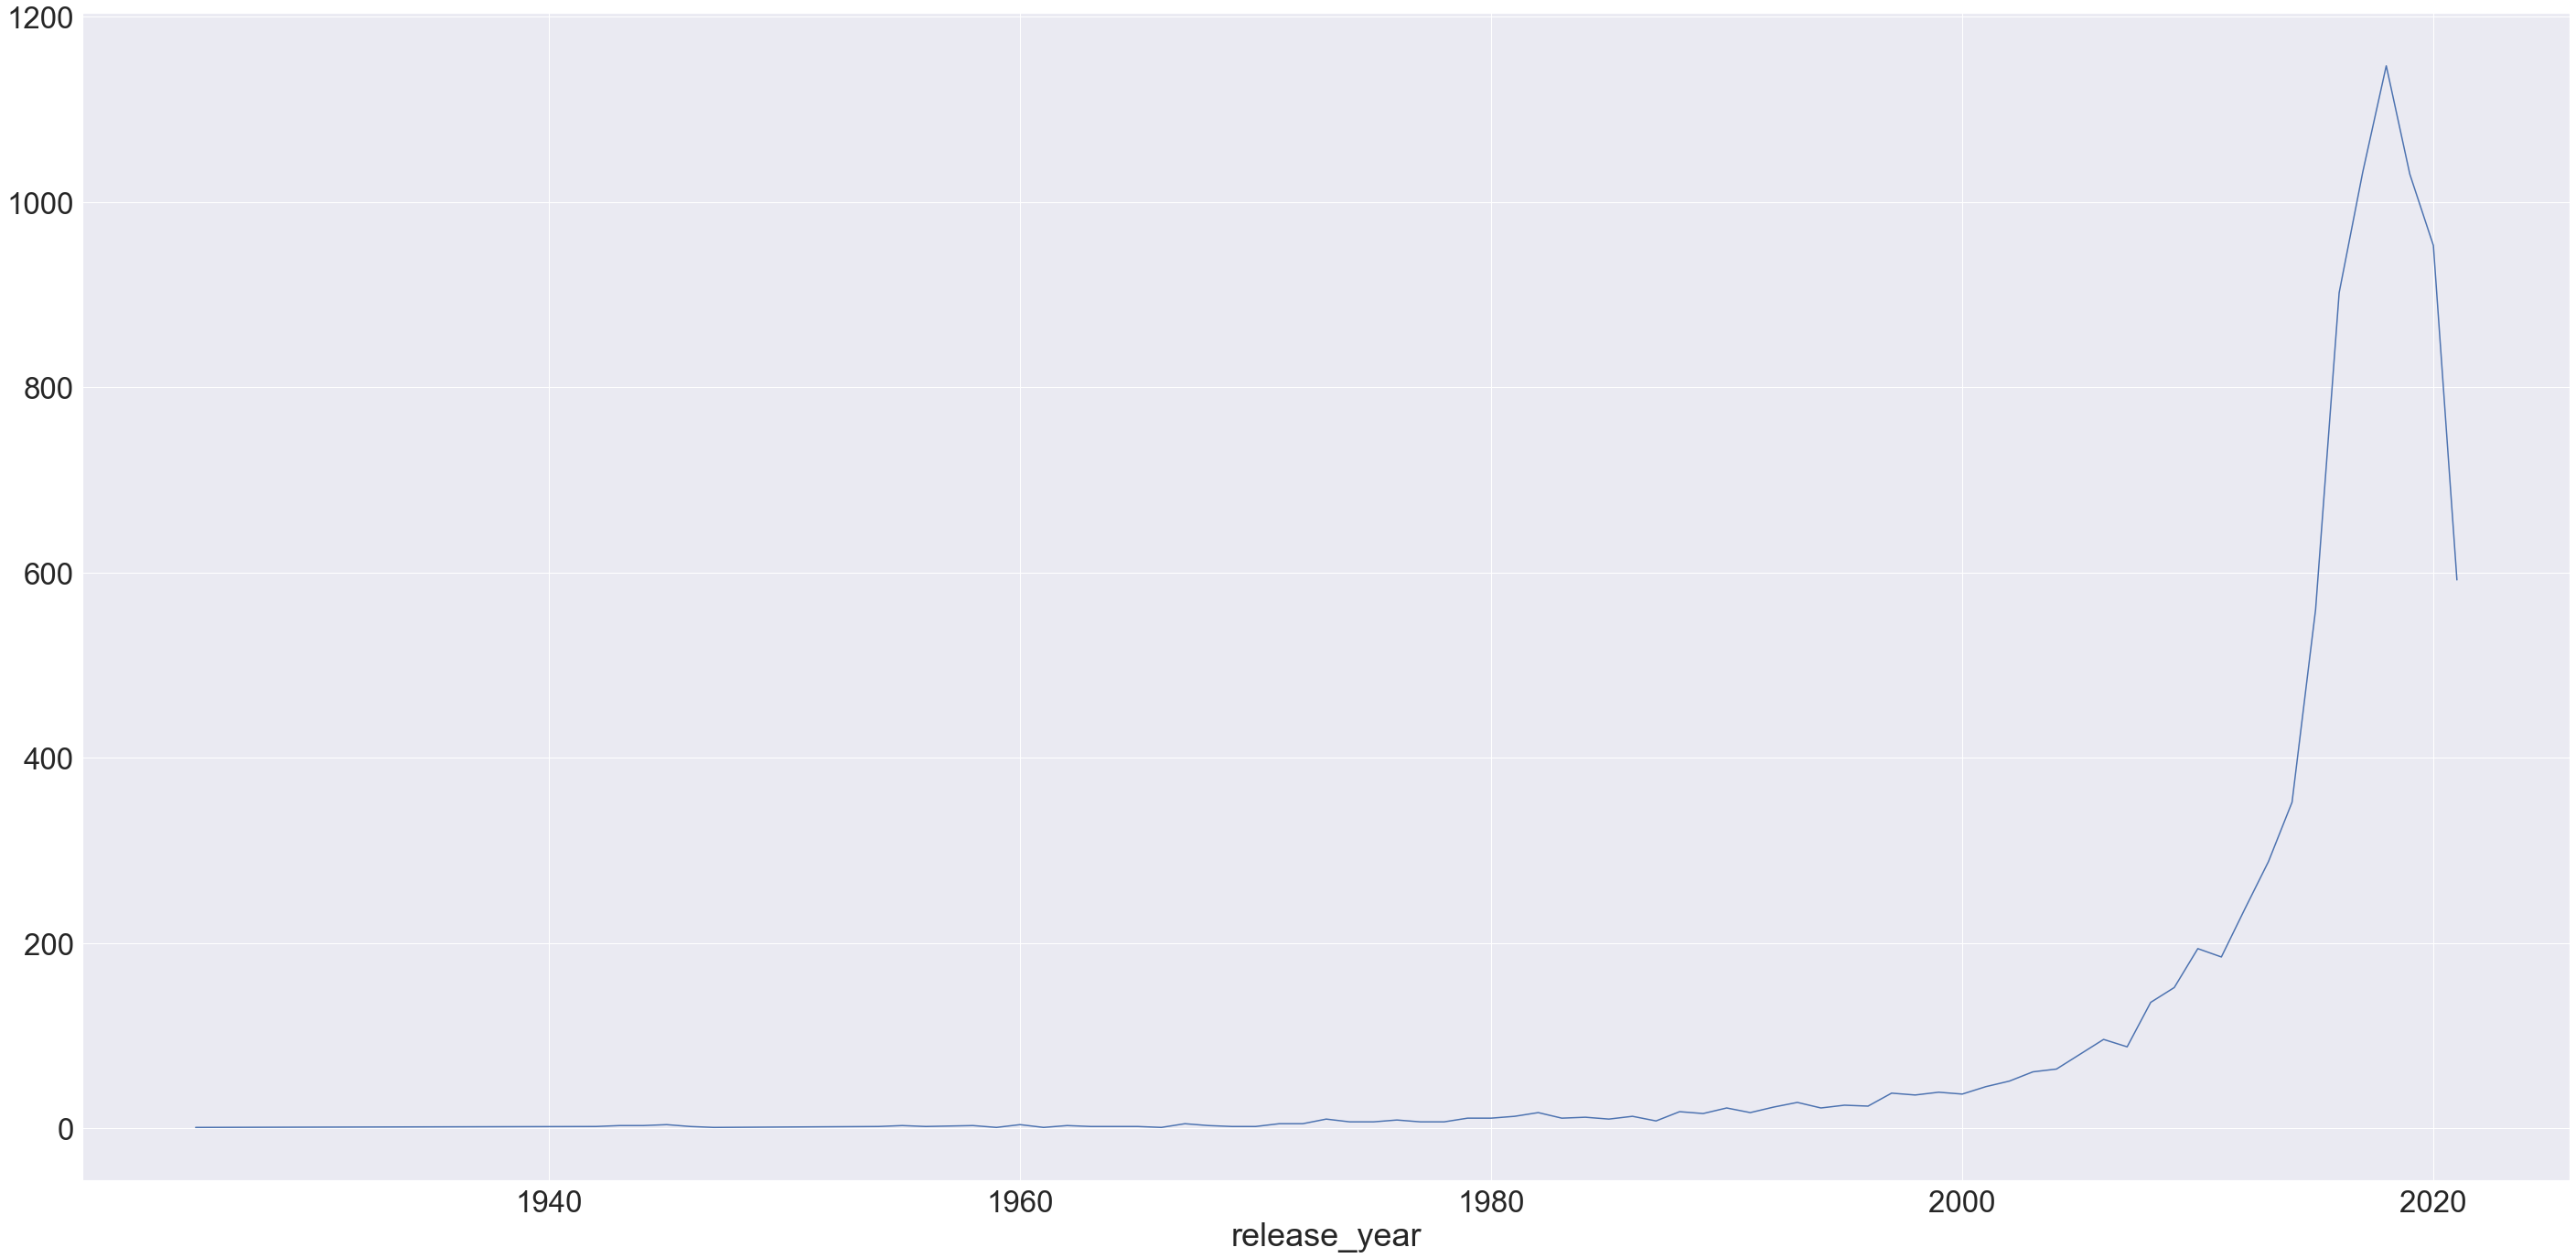

In [190]:
sns.set(font_scale = 3)
df.groupby(by='release_year').count()['type'].plot()
plt.tight_layout()

# Listed In

In [191]:
df['listed_in'].value_counts()

Dramas, International Movies                                 362
Documentaries                                                359
Stand-Up Comedy                                              334
Comedies, Dramas, International Movies                       274
Dramas, Independent Movies, International Movies             252
                                                            ... 
Docuseries, TV Sci-Fi & Fantasy                                1
Romantic TV Shows, Teen TV Shows                               1
Dramas, Faith & Spirituality, Independent Movies               1
Romantic TV Shows, Spanish-Language TV Shows, TV Comedies      1
Documentaries, Dramas                                          1
Name: listed_in, Length: 514, dtype: int64

In [192]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

<AxesSubplot:xlabel='count', ylabel='listed_in'>

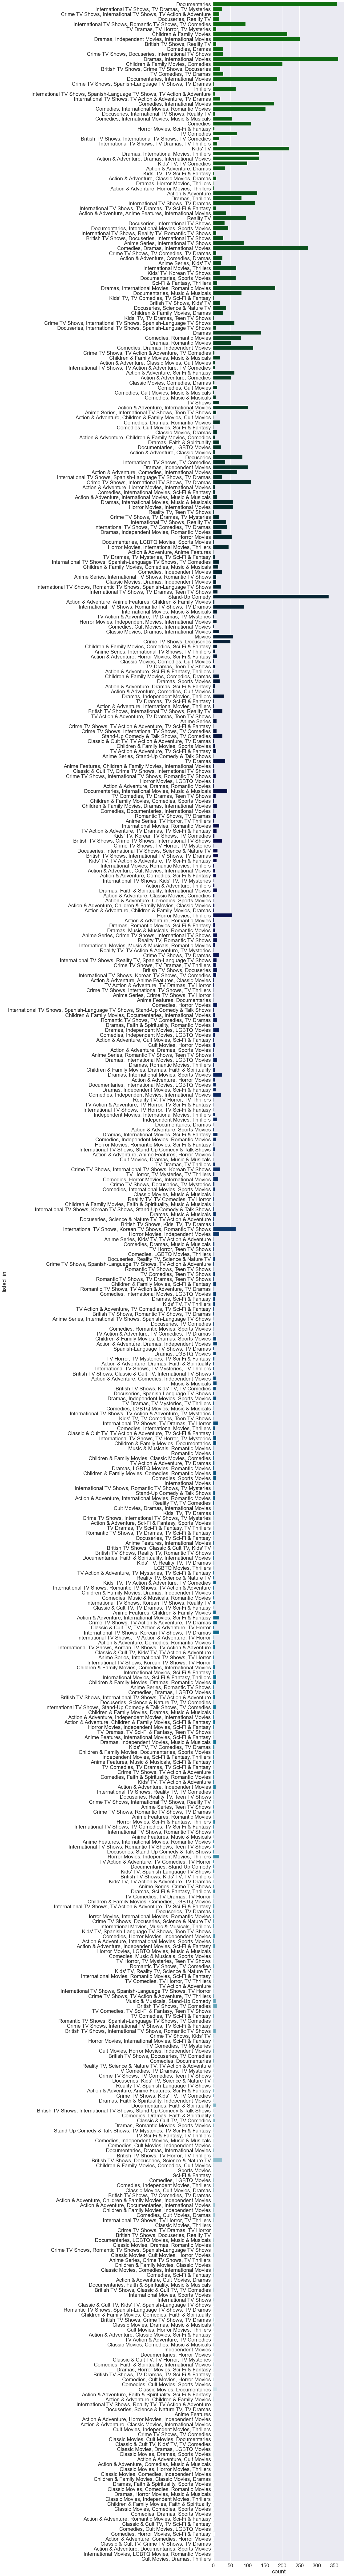

In [193]:
sns.set(font_scale = 2)
plt.figure(figsize = (10, 200)) 
sns.countplot(y='listed_in',data=df,palette='ocean')

**Countplot on column ['listed_in']**

# Description

In [194]:
df['description'].value_counts().head(10)

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.     2
An affable, newly appointed college warden proves to be no ordinary man when an old enemy resurfaces and exposes his complicated, violent past.              2
After growing up enduring criticism from his f

# Conclusion